# LAB 3
--------------------------------------------------------------------------------
# Name : Vedant R Landge
# PRN : 20190802005
# ADVANCED AI

# AIM : To study and perform low-level feature extraction on image data.

In [1]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
from matplotlib import pyplot as plt

## A. Edge Detection using Prewitt filter:

#### 1. Read the image data.

In [2]:
img = cv2.imread('Vegetable Image.png')

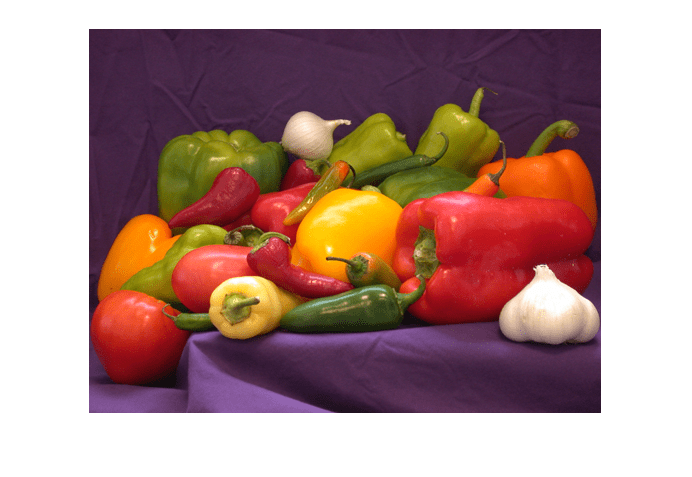

In [3]:
cv2_imshow(img)

#### 2. Convert the image into a grayscale.

In [4]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

In [5]:
img_gaussian = cv2.GaussianBlur(gray,(3,3),0)

#### 3. Perform Prewitt operation for horizontal mask

In [6]:
kernalx = np.array([[1,1,1],[0,0,0],[-1,-1,-1]])
prewitt_h = cv2.filter2D(img_gaussian, -1, kernalx)

#### 4. Perform Prewitt operation for the vertical mask.

In [7]:
kernaly = np.array([[-1,0,1],[-1,0,1],[-1,0,1]])
prewitt_v = cv2.filter2D(img_gaussian, -1, kernaly)

#### 5. Provide a single output for the input image.

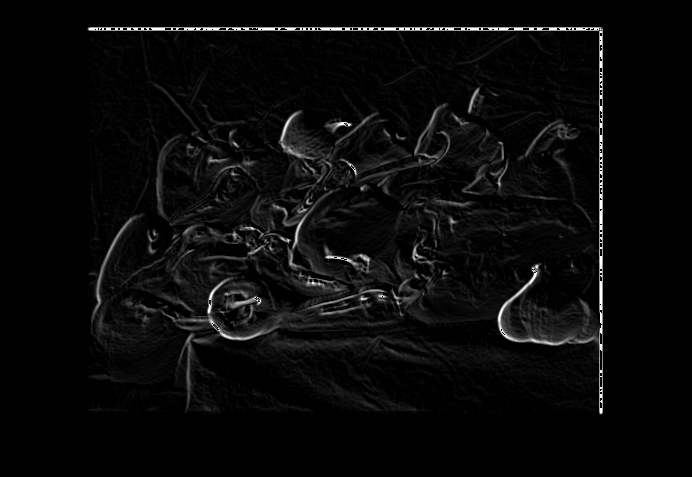

In [8]:
cv2_imshow(prewitt_h + prewitt_v)

## B. Canny edge detection:

In [9]:
weak_th = None
strong_th = None

#### 1. Read the image data.

In [10]:
img = cv2.imread('Vegetable Image.png')

In [11]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

#### 2. Applying Gaussian blur filter to smooth data.

In [12]:
img = cv2.GaussianBlur(img, (5,5), 1.4)

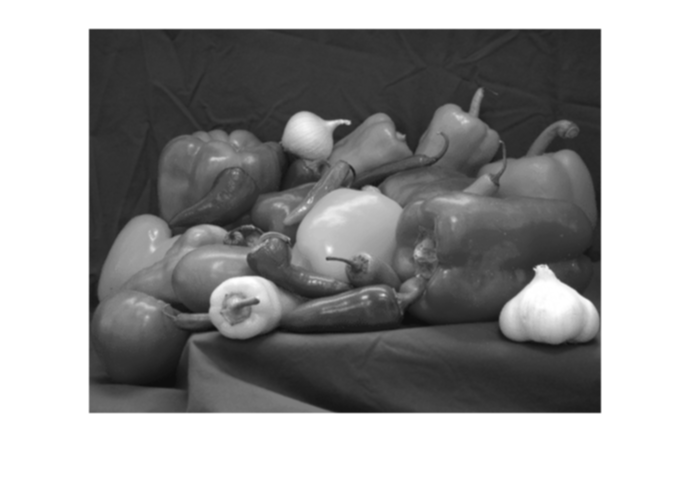

In [13]:
cv2_imshow(img_gaussian)

#### 3. Apply the Sobel filter to get the intensity and edge direction matrices.

In [14]:
gx = cv2.Sobel(np.float32(img), cv2.CV_64F, 1, 0, 3)
gy = cv2.Sobel(np.float32(img), cv2.CV_64F, 0, 1, 3)

In [15]:
mag, ang = cv2.cartToPolar(gx, gy, angleInDegrees = True)

#### 4. Identify the thick and thin edges

In [16]:
mag_max = np.max(mag)
if not weak_th : weak_th = mag_max * 0.1
if not strong_th : strong_th = mag_max * 0.5

In [17]:
height, width = img.shape

#### 5. Apply non-Max Suppression to thin the edges.

In [18]:
for i_x in range(width):
  for i_y in range(height):

    grad_ang = ang[i_y, i_x]
    grad_ang = abs(grad_ang-180) if abs(grad_ang)>180 else abs(grad_ang)

    if grad_ang<=22.5:
      neighb_1_x, neighb_1_y = i_x-1, i_y
      neighb_2_x, neighb_2_y = i_x+1, i_y

    elif grad_ang>22.5 and grad_ang<=(22.5+45):
      neighb_1_x, neighb_1_y = i_x-1, i_y-1
      neighb_2_x, neighb_2_y = i_x+1, i_y+1

    elif grad_ang>(22.5+45) and grad_ang<=(22.5+90):
      neighb_1_x, neighb_1_y = i_x, i_y-1
      neighb_2_x, neighb_2_y = i_x+1, i_y+1

    elif grad_ang>(22.5+90) and grad_ang<=(22.5+135):
      neighb_1_x, neighb_1_y = i_x-1, i_y+1
      neighb_2_x, neighb_2_y = i_x+1, i_y-1

    elif grad_ang>(22.5+135) and grad_ang<=(22.5+180):
      neighb_1_x, neighb_1_y = i_x-1, i_y
      neighb_2_x, neighb_2_y = i_x+1, i_y

    if width>neighb_1_x>=0 and height>neighb_1_y>=0:
      if mag[i_y, i_x]<mag[neighb_1_y, neighb_1_x]:
        mag[i_y, i_x]=0
        continue

    if width>neighb_2_x>=0 and height>neighb_2_y>=0:
      if mag[i_y, i_x]<mag[neighb_2_y, neighb_2_x]:
        mag[i_y, i_x]=0

In [19]:
weak_ids = np.zeros_like(img)
strong_ids = np.zeros_like(img)
ids = np.zeros_like(img)

#### 6. Apply Double Threshold to find Strong, Weak and Non-relevant pixels.

In [20]:
for i_x in range(width): 
  for i_y in range(height): 
              
    grad_mag = mag[i_y, i_x] 
              
    if grad_mag<weak_th: 
      mag[i_y, i_x]= 0
    elif strong_th>grad_mag>= weak_th: 
      ids[i_y, i_x]= 1
    else: 
      ids[i_y, i_x]= 2

#### 7. Perform edge tracking hysteresis to convert weak pixels into the stronger pixel.

#### 8. Provide the output image.

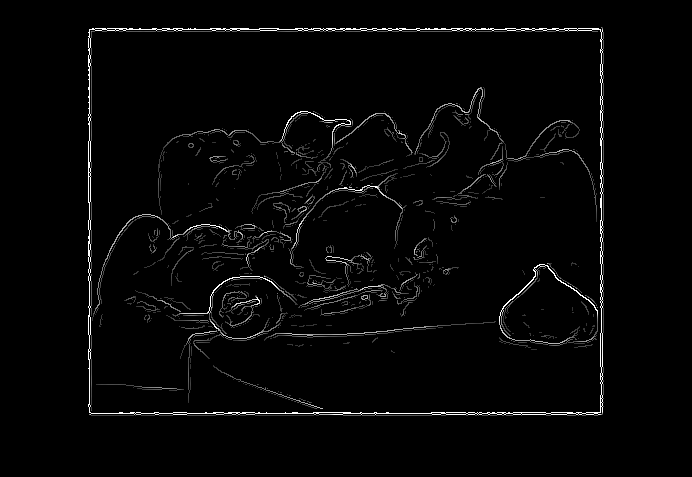

In [21]:
cv2_imshow(mag)

## C. Laplacian of Gaussian:

#### 1. Read the image data.

In [22]:
src = cv2.imread('Vegetable Image.png')

#### 2. Remove noise by applying a Gaussian blur

In [23]:
src = cv2.GaussianBlur(src, (3,3),0)

#### 3. Convert the image to grayscale

In [24]:
 src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

#### 4. Apply a Laplacian operator to the grayscale image and obtain the output image

In [25]:
dst = cv2.Laplacian(src_gray, cv2.CV_16S, ksize=3)

#### 5. Display the result in a window.

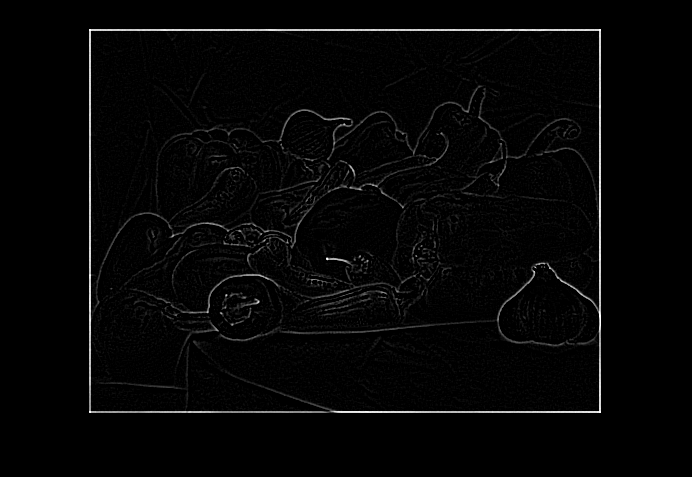

In [26]:
cv2_imshow(dst)

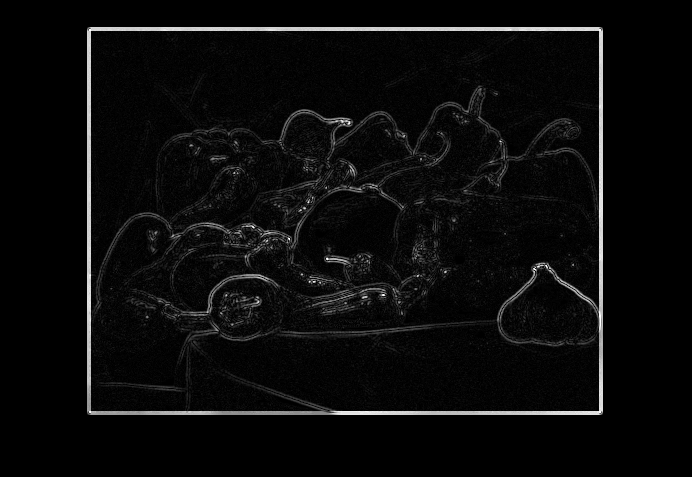

In [27]:
# converting back to unit8

abs_dst = cv2.convertScaleAbs(dst)
cv2_imshow(abs_dst)

## D. Perform and comparison between Gradient-based and Gaussian-based operators

Edge Detection Operators are of two types: 

Gradient – based operator which computes first-order derivations in a digital image like, Sobel operator, Prewitt operator, Robert operator.
Gaussian – based operator which computes second-order derivations in a digital image like, Canny edge detector, Laplacian of Gaussian.

## Conclusion:

The  performance  of  the  Canny algorithm  relies  mainly  on  the  changing  parameters which are standard deviation for the Gaussian filter, and its  threshold  values.  The size  of the  Gaussian filter  is controlled by the  greater value and the larger size. The larger size produces more noise, which is necessary for noisy images, as well as detecting larger edges. We have lesser accuracy of the localization of the  edge then the larger scale of the Gaussian.  For the smaller values we need a new  algorithm to adjust  these parameters.   The user  can  modify  the  algorithm  by  changing  these parameters to  suit  the different environments. Canny’s edge detection algorithm is more costly in comparing to Sobel, Prewitt operator. 

Even though, the Canny’s  edge  detection  algorithm  has  a  better performance. The evaluation of the images showed that under the Canny, Sobel, Prewitt are exhibited better performance, respectively. The  various  methodologies  of  using  edge  detection techniques  namely  the  Gradient  and  Laplacian transformation.  It  seems  that  although  Laplacian  does the better for some features (i.e. the fins), it still suffers from mismapping some of the lines.